## 🧠 Project: NeuroPredict

### AI-assisted early diagnosis of neurodegenerative diseases

## STEP 1 : DATA CLEANING

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
## Import the data from the Kaggle dataset (.csv file) to Pandas data frames
parkinsson_disease = pd.read_csv('Parkinsson disease.csv')
parkinsson_disease

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
## Printing Data frames
parkinsson_disease.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
pd.set_option('display.max_columns', None)
parkinsson_disease

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
pd.set_option('display.max_columns',10)
parkinsson_disease

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),...,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,...,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,...,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,...,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,...,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,...,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,...,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,...,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,...,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,...,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
# See Missing values 
parkinsson_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
parkinsson_disease.isnull().sum().sort_values(ascending=False)

name                0
MDVP:Fo(Hz)         0
D2                  0
spread2             0
spread1             0
DFA                 0
RPDE                0
status              0
HNR                 0
NHR                 0
Shimmer:DDA         0
MDVP:APQ            0
Shimmer:APQ5        0
Shimmer:APQ3        0
MDVP:Shimmer(dB)    0
MDVP:Shimmer        0
Jitter:DDP          0
MDVP:PPQ            0
MDVP:RAP            0
MDVP:Jitter(Abs)    0
MDVP:Jitter(%)      0
MDVP:Flo(Hz)        0
MDVP:Fhi(Hz)        0
PPE                 0
dtype: int64

In [8]:
parkinsson_disease.describe() # Description

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),...,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,...,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,...,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,...,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,...,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,...,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,...,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,...,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
parkinsson_disease.describe(include='all')

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),...,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S01_1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,...,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,...,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,...,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,...,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,...,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,...,0.761881,-5.046192,0.279234,2.636456,0.252980


In [10]:
# Number of missing values per column
print(parkinsson_disease.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


## STEP 2 : 📊 EDA (Exploratory Data Analysis)

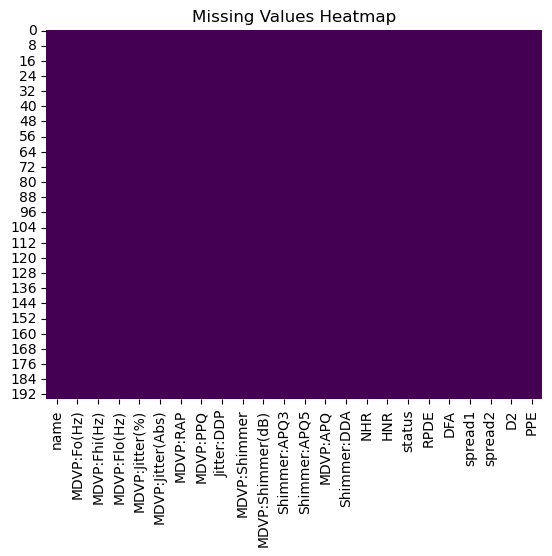

In [11]:
# Visualize missing values
sns.heatmap(parkinsson_disease.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

status
1    147
0     48
Name: count, dtype: int64


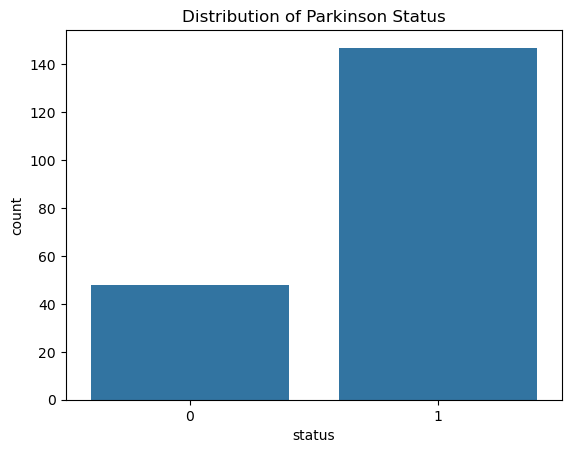

In [12]:
# Analysis of the target variable (e.g., status)
if 'status' in parkinsson_disease.columns:
    print(parkinsson_disease['status'].value_counts())

    sns.countplot(x='status', data=parkinsson_disease)
    plt.title("Distribution of Parkinson Status")
    plt.show()

## 🌟 NeuroPredictCare – AI-Powered Neurological Diagnostic Platform

NeuroPredictCare is a smart medical platform designed to assist doctors in neurological diagnostics using AI. 
It simulates a private hospital environment, where patient information and brain MRI scans are analyzed to provide diagnostic support, treatment suggestions, and urgency evaluation.

In [13]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [14]:
# ---------------------------------------------
# NeuroPredictCare - Step 1 : Patient Arrival & Data Collection
# ---------------------------------------------

# Import libraries
from IPython.display import display

print("🏥 Welcome to Sheikh Khalifa Bin Zayed Hospital, Casablanca")
print("📝 Patient registration by the hospital assistant (secretary)")

# --------------------------
# Collect patient information
# --------------------------
patient = {}
patient['first_name'] = input("First Name: ")
patient['last_name'] = input("Last Name: ")
patient['age'] = int(input("Age: "))
patient['gender'] = input("Gender (Male/Female): ")
patient['marital_status'] = input("Marital Status (Single/Married): ")
patient['phone_number'] = input("Phone Number: ")
patient['address'] = input("Address: ")

# --------------------------
# Display confirmation
# --------------------------
print("\n✅ Patient information successfully recorded!")
print("Patient details:")
for key, value in patient.items():
    print(f"{key.replace('_',' ').title()}: {value}")

print("\n💺 You can now take a seat. The doctor will call you when ready.")

# ---------------------------------------------
# NeuroPredictCare - Step 2 : Patient waits and consults the doctor
# ---------------------------------------------
import time
import random

print("\n💺 The patient takes a seat and waits for the doctor.")

# Simulate waiting time (2, 5, or 10 minutes)
wait_time = random.choice([2, 5, 10])
print(f"⏳ Waiting for {wait_time} minutes...")
time.sleep(2)  # For demonstration, we simulate 2 seconds instead of minutes

# Secretary calls the patient
print("\n📞 Secretary: 'The doctor is ready. Please come in.'")
input("Press Enter to knock on the door... (toc-toc)")

# Patient enters
print(f"\n🚪 Patient: 'Hello Doctor, how are you?'")
print(f"👨‍⚕️ Doctor: 'Hello {patient['first_name']}, how are you today? Please have a seat.'")

# Patient gives documents
print("\n📄 Patient: 'Doctor, here are my MRI scans. I have 3 MRIs from different hospitals, and the fourth is from here. Can you give me a diagnosis?'")




# ---------------------------------------------
# NeuroPredictCare - Step 3 : MRI Analysis & Pathology Prediction
# ---------------------------------------------




🏥 Welcome to Sheikh Khalifa Bin Zayed Hospital, Casablanca
📝 Patient registration by the hospital assistant (secretary)


First Name:  RIHAB
Last Name:  MORAFIQ
Age:  23
Gender (Male/Female):  Female
Marital Status (Single/Married):  Single
Phone Number:  000000000
Address:  Casablanca, Morocco



✅ Patient information successfully recorded!
Patient details:
First Name: RIHAB
Last Name: MORAFIQ
Age: 23
Gender: Female
Marital Status: Single
Phone Number: 000000000
Address: Casablanca, Morocco

💺 You can now take a seat. The doctor will call you when ready.

💺 The patient takes a seat and waits for the doctor.
⏳ Waiting for 5 minutes...

📞 Secretary: 'The doctor is ready. Please come in.'


Press Enter to knock on the door... (toc-toc) toc toccc



🚪 Patient: 'Hello Doctor, how are you?'
👨‍⚕️ Doctor: 'Hello RIHAB, how are you today? Please have a seat.'

📄 Patient: 'Doctor, here are my MRI scans. I have 3 MRIs from different hospitals, and the fourth is from here. Can you give me a diagnosis?'


In [22]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import io

# File upload widget (images only)
uploader = widgets.FileUpload(
    accept='image/*',
    multiple=False
)
display(uploader)

# Button to display the uploaded image
button = widgets.Button(description="Show Image")
display(button)

# Output widget to show the image
output = widgets.Output()
display(output)

def on_button_click(b):
    with output:
        clear_output(wait=True)  # Clear previous images
        if uploader.value:
            # Get the first uploaded file (tuple format)
            uploaded_file = uploader.value[0]
            content = uploaded_file['content']
            # Open and display image
            img = Image.open(io.BytesIO(content))
            display(img)
        else:
            print("No file uploaded.")

# Link button click to function
button.on_click(on_button_click)



FileUpload(value=(), accept='image/*', description='Upload')

Button(description='Show Image', style=ButtonStyle())

Output()

In [29]:
import time
import random

# --- Pathologies + recommendations ---
pathologies = {
    "Brain Tumor": "Possible tumor, schedule biopsy and neuro-oncology consultation",
    "Stroke": "Cerebral infarction, urgent treatment according to stroke protocol",
    "Multiple Sclerosis": "Demyelinating plaques, confirm with lumbar puncture and follow-up",
    "Intracranial Hemorrhage": "Monitor in neuro-intensive care and manage based on severity",
    "Hydrocephalus": "Evaluate need for ventricular shunt and monitor symptoms",
    "Brain Atrophy": "Cognitive follow-up, rehabilitation if necessary, neurodegeneration prevention plan",
    "Benign Lesion": "Regular monitoring, intervention only if symptoms appear"
}

# --- Patient history ---
history = []

def simulate_patient():
    patient_name = input("\nEnter patient name: ")
    suspect_region = input("Enter suspect brain region (optional, press Enter to skip): ")

    print(f"\n🤔 Doctor is reviewing {patient_name}'s MRI scans{f' of {suspect_region}' if suspect_region else ''} and thinking...")
    time.sleep(2)

    consultation = random.choice([True, False])
    if consultation:
        print("👨‍⚕️ Doctor: 'Let me discuss this case with my colleagues in the neurology department.'")
        time.sleep(2)
        print("👨‍⚕️ Doctor: 'After consultation, here is the decision based on the MRI scans.'")
    else:
        print("👨‍⚕️ Doctor: 'I have reviewed the MRIs. Here is my decision.'")

    time.sleep(1)

    diagnosis = random.choice(list(pathologies.keys()))
    confidence = random.uniform(0.7, 0.98)

    print(f"\n🧠 NeuroPredict AI analysis for {patient_name}: {diagnosis} (Confidence: {confidence:.2%})")
    print(f"👨‍⚕️ Doctor Recommendation: {pathologies[diagnosis]}")

    if confidence > 0.85:
        print("✅ Doctor: 'We are confident in this diagnosis, but will confirm with additional tests if necessary.'")
    else:
        print("⚠️ Doctor: 'The results are uncertain. Additional tests are required.'")

    time.sleep(1)
    print(f"\n📋 Next Steps for {patient_name}:")
    if diagnosis == "Brain Tumor":
        print("➡️ Plan: Schedule biopsy and organize neuro-oncology consultation.")
    elif diagnosis == "Stroke":
        print("➡️ Plan: Urgent treatment according to stroke protocol, monitoring, and rehabilitation.")
    elif diagnosis == "Multiple Sclerosis":
        print("➡️ Plan: Confirm with lumbar puncture and additional imaging, regular neurological follow-up.")
    elif diagnosis == "Intracranial Hemorrhage":
        print("➡️ Plan: Monitor in neuro-intensive care and manage based on severity.")
    elif diagnosis == "Hydrocephalus":
        print("➡️ Plan: Evaluate need for ventricular shunt and monitor symptoms.")
    elif diagnosis == "Brain Atrophy":
        print("➡️ Plan: Cognitive follow-up, rehabilitation if necessary, neurodegeneration prevention plan.")
    elif diagnosis == "Benign Lesion":
        print("➡️ Plan: Regular monitoring, intervention only if symptoms appear.")

    history.append({
        "Patient": patient_name,
        "Region": suspect_region,
        "Diagnosis": diagnosis,
        "Confidence": f"{confidence:.2%}",
        "Recommendation": pathologies[diagnosis]
    })

    print("\n✅ Patient management plan generated successfully.\n")
    time.sleep(1)

# --- Main menu ---
def main_menu():
    while True:
        print("\n--- NeuroPredict AI Clinical Simulation ---")
        print("1. Add new patient")
        print("2. Show patient history")
        print("3. Exit")
        choice = input("Select an option: ")

        if choice == "1":
            simulate_patient()
        elif choice == "2":
            if history:
                print("\n📜 Patient History:")
                for i, record in enumerate(history, 1):
                    print(f"{i}. {record['Patient']} ({record['Region']}) - {record['Diagnosis']} - {record['Confidence']}")
                    print(f"   Recommendation: {record['Recommendation']}")
            else:
                print("No patients yet.")
        elif choice == "3":
            print("Exiting NeuroPredict. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

# --- Run the menu ---
if __name__ == "__main__":
    main_menu()



--- NeuroPredict AI Clinical Simulation ---
1. Add new patient
2. Show patient history
3. Exit


Select an option:  1

Enter patient name:  AICHA
Enter suspect brain region (optional, press Enter to skip):  



🤔 Doctor is reviewing AICHA's MRI scans and thinking...
👨‍⚕️ Doctor: 'Let me discuss this case with my colleagues in the neurology department.'
👨‍⚕️ Doctor: 'After consultation, here is the decision based on the MRI scans.'

🧠 NeuroPredict AI analysis for AICHA: Benign Lesion (Confidence: 89.78%)
👨‍⚕️ Doctor Recommendation: Regular monitoring, intervention only if symptoms appear
✅ Doctor: 'We are confident in this diagnosis, but will confirm with additional tests if necessary.'

📋 Next Steps for AICHA:
➡️ Plan: Regular monitoring, intervention only if symptoms appear.

✅ Patient management plan generated successfully.


--- NeuroPredict AI Clinical Simulation ---
1. Add new patient
2. Show patient history
3. Exit


Select an option:  1

Enter patient name:  RIHAB
Enter suspect brain region (optional, press Enter to skip):  



🤔 Doctor is reviewing RIHAB's MRI scans and thinking...
👨‍⚕️ Doctor: 'Let me discuss this case with my colleagues in the neurology department.'
👨‍⚕️ Doctor: 'After consultation, here is the decision based on the MRI scans.'

🧠 NeuroPredict AI analysis for RIHAB: Brain Atrophy (Confidence: 95.68%)
👨‍⚕️ Doctor Recommendation: Cognitive follow-up, rehabilitation if necessary, neurodegeneration prevention plan
✅ Doctor: 'We are confident in this diagnosis, but will confirm with additional tests if necessary.'

📋 Next Steps for RIHAB:
➡️ Plan: Cognitive follow-up, rehabilitation if necessary, neurodegeneration prevention plan.

✅ Patient management plan generated successfully.


--- NeuroPredict AI Clinical Simulation ---
1. Add new patient
2. Show patient history
3. Exit


Select an option:  2



📜 Patient History:
1. AICHA () - Benign Lesion - 89.78%
   Recommendation: Regular monitoring, intervention only if symptoms appear
2. RIHAB () - Brain Atrophy - 95.68%
   Recommendation: Cognitive follow-up, rehabilitation if necessary, neurodegeneration prevention plan

--- NeuroPredict AI Clinical Simulation ---
1. Add new patient
2. Show patient history
3. Exit


Select an option:  3


Exiting NeuroPredict. Goodbye!
